#Klasyfikacja zbiorów: MNIST, CIFAR-10, CIFAR-100


In [79]:
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.datasets import cifar100

from keras import models
from keras import layers
from keras.utils import to_categorical
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# MNIST

**Przygotowanie danych**

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels)

Train dataset
(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
Test dataset
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]




*   Zbiór MNIST składa się z obrazów ręcznie zapisanych cyfr o 10 kategoriach 
(cyfry 0-9)
*   Zbiór treningowy składa się z 60000 obrazów o rozmiarze 28x28 
*   Zbiór testowy składa się z 10000 obrazów o rozmiarze 28x28 


Przygotowanie danych w postaci obrazów 

In [24]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

* Przeskalowanie pikseli z [0-255] do [0-1]
* Zmiana z typu uint8 na float32
* Wyjście w postaci 1 wymiarowego tensora: [60000, 28 28], [10000, 28 28]

Przygotowanie etykiet

In [25]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Zamiana etykiet z wartości [0, 9] na 10 wymiarowy wektor który ma reprezentować cyfrę w postaci 'binarnej'

**Tworzenie sieci**

In [26]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

* Sequential - model sieci z sekwencją warstw, z których każda stopniowo ekstraktuje dane w celu uzyskania pożądanego wyniku
* Dense - sieci połączone gęsto
* Relu - funkcja nieliniowa, dodatnie wejścia przechodzą bez zmian, jednocześnie ograniczając wszystko inne do zera
* Softmax - zamienia wektor liczb na wektor prawdopodobieństw
* Druga warstwa jest 10-elementową wartstwą zawracającą tablicę 10 wartości prawdopodbieństwa (których suma = 1), oznacza to prawdopodbienstwo wystapienia cyfry na obrazie

Kompilacja sieci

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

*   Optymalizator - rmsprop   
*   Funkcja straty - categorical_crossentropy
*   Metryka - accuracy - liczba poprawnie zaklasyfikowanych obrazów



Trenowanie sieci

In [34]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
network.save('mnist_model.h5') 

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 9.4227e-04 - accuracy: 0.9999
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 6.7060e-04 - accuracy: 1.0000
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 5.2189e-04 - accuracy: 1.0000
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 3.8341e-04 - accuracy: 1.0000
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 3.3506e-04 - accuracy: 1.0000


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9810
test_loss:  0.06225861981511116
test_acc:  98.1000006198883


In [38]:
#Wizaulizacja straty i dostosowania
#accuracy = network.history['acc']
#val_accuracy = network.history['val_acc']
#loss = network.history['loss']
#val_loss = network.history['val_loss']
#epochs = range(len(accuracy))
#plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
#plt.title('Training and validation accuracy')
#plt.legend()
#plt.show()
#plt.figure()
#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()
#plt.show()

**Przewidywanie rezultatów**

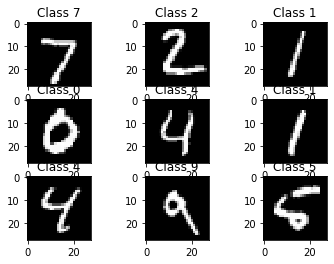

In [45]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(np.argmax(test_labels[i])))
    #plt.title("Predict {}".format(np.argmax(network.predict(test_images[i])))#

**Wnioski**

Można uzyskać jeszcze lepsze wyniki przy zastosowaniu sieci konwolucyjnych. Do poprawy: uzyskanie przewidywanych etykiet oraz wizualizacja straty i dopasowania na wykresach.

# CIFAR-10

**Przygotowanie danych**

In [51]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels.shape)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels.shape)

Train dataset
(50000, 32, 32, 3)
50000
(50000, 1)
Test dataset
(10000, 32, 32, 3)
10000
(10000, 1)


*   Zbiór CIFAR-10 składa się z  60000 kolorowych obrazów o wymiarach 32×32 w 10 klasach
*   Zbiór treningowy składa się z 50000 obrazów
*   Zbiór testowy składa się z 10000 obrazów

Przygotowanie danych w postaci obrazów

In [52]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Przygotowanie etykiet

In [53]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [54]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.3))

network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))   

network.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      



*   Sieć przetwarza obiekty wejściowe o rozmiarze (32, 32, 3)
*   Liczba kanałów - 32
*   Wysokość i szerkość zmniejszają się wraz z warstwami sieci
*   Flatten - spłaszczamy sieć do jednowymiarowgo tensora
*   Conv2D - tworzy sieć konwolucyjną
*   BatchNormalization - normalizuje wejścia, sieć działa szybciej
*   MaxPooling2D - zmniejsza cechy o połowę, zmniejsza rozdzielczość bo kolejne wartwy mają coraz to większe okna


Kompilacja sieci

In [55]:
network.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Trenowanie sieci

In [56]:
network.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))
network.save('cifar10_model.h5') 

Epoch 1/10
782/782 [==============================] - 501s 637ms/step - loss: 1.7147 - accuracy: 0.4082 - val_loss: 1.1886 - val_accuracy: 0.5796
Epoch 2/10
782/782 [==============================] - 507s 648ms/step - loss: 1.1861 - accuracy: 0.5788 - val_loss: 1.0095 - val_accuracy: 0.6447
Epoch 3/10
782/782 [==============================] - 502s 642ms/step - loss: 0.9980 - accuracy: 0.6483 - val_loss: 0.9370 - val_accuracy: 0.6765
Epoch 4/10
782/782 [==============================] - 478s 611ms/step - loss: 0.8834 - accuracy: 0.6902 - val_loss: 0.7956 - val_accuracy: 0.7151
Epoch 5/10
782/782 [==============================] - 483s 618ms/step - loss: 0.8131 - accuracy: 0.7174 - val_loss: 0.7750 - val_accuracy: 0.7322
Epoch 6/10
782/782 [==============================] - 485s 620ms/step - loss: 0.7592 - accuracy: 0.7376 - val_loss: 0.8509 - val_accuracy: 0.7078
Epoch 7/10
782/782 [==============================] - 538s 688ms/step - loss: 0.7141 - accuracy: 0.7529 - val_loss: 0.6896 -

In [ ]:
history = tf.keras.models.load_model('cifar10_model.h5')

# Loss
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
# Accuracy
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [63]:
test_loss, test_acc = history.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc*100)

313/313 [==============================] - 22s 71ms/step - loss: 0.6185 - accuracy: 0.7949
test_loss:  0.618531346321106
test_acc:  79.49000000953674


**Przewidywanie rezultatów**

313/313 [==============================] - 22s 71ms/step


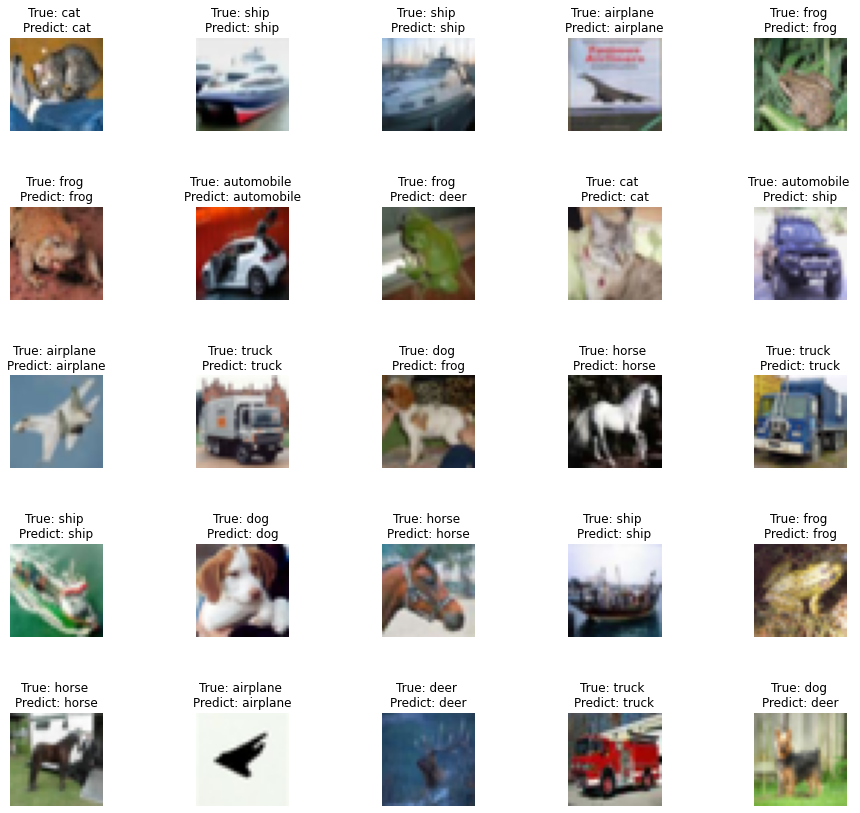

In [64]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

pred = network.predict(test_images)
pred_classes = np.argmax(pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Wnioski**

Skrócenie czasu działania dopasowywania sieci (obecnie ok. 45min), im większa liczba epok tym lepsze dopasowanie. Do poprawy: wyświetlanie wykresów straty i dopasowania

# CIFAR-100

**Przygotowanie danych**

In [91]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels)

Train dataset
(50000, 32, 32, 3)
50000
[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]
Test dataset
(10000, 32, 32, 3)
10000
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


*   Zbiór CIFAR-100 składa się z obrazów o 100 kategoriach 
(cyfry 0-9)
*   Zbiór treningowy składa się z 60000 obrazów o rozmiarze 32x32 
*   Zbiór testowy składa się z 10000 obrazów o rozmiarze 32x32 

Przygotowanie danych w postaci obrazów

In [92]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Przygotowanie etykiet

In [93]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [98]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.3))

network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))   

network.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

Kompilacja sieci

In [99]:
network.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Trenowanie sieci

In [101]:
network.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

network.save('cifar100_model.h5') 

Epoch 1/10


ValueError: ignored

In [ ]:
history = load_model('cifar10_model.h5')

# Loss
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
# Accuracy
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)